# Kerchunk JSON File Recipe
The standard format for Kerchunk files is JSON for storing references to archive data chunks. This requires fsspec and xarray - although these do not need to be the latest, there is no need to not use fsspec 2023.6.0+ and xarray 2023.8.0+ as these will also work with Parquet.

In [1]:
import fsspec
import xarray as xr

Open a virtual filesystem object from fsspec, providing the kerchunk file as a 'reference' type file. Note that if the file is compressed using zstd as some kerchunk files are, the compression needs to be set to 'zstd'/'zst'

In [2]:
kfile = 'https://dap.ceda.ac.uk/neodc/esacci/land_surface_temperature/metadata/kerchunk/AQUA_MODIS/L3C/0.01/v3.00/monthly/ESACCI-LST-L3C-LST-MODISA-0.01deg_1MONTHLY_DAY-200207-201812-fv3.00-kr1.1.json'
mapper = fsspec.get_mapper('reference://',fo=kfile, backend_kwargs={'compression':None})

Then we can open a virtual xarray dataset object to plot or perform some processing.

In [3]:
ds = xr.open_zarr(mapper, consolidated=False)

Any plotting can then be done with this object.

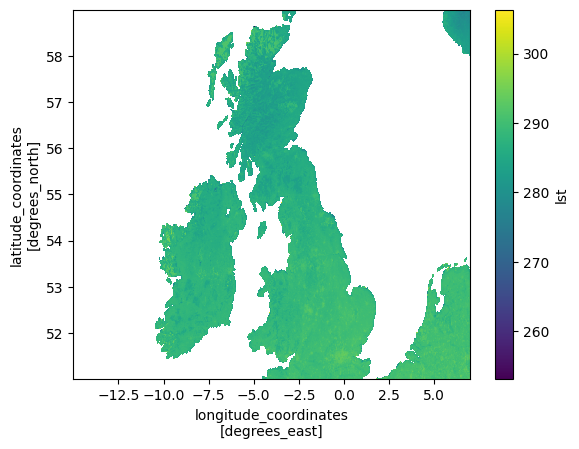

In [5]:
ds['lst'].sel(lat=slice(51,59), lon=slice(-15,7)).mean(dim='time').plot()